In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from collections import deque
import os

In [2]:
def generate_ma_q(n=1000, coeffs=[0.7,]):
    x = np.random.randn(n)
    w = np.random.randn(n)
    for i in range(len(coeffs), n):
        x[i] = w[i]
        for j in range(len(coeffs)):
            x[i] += w[i-j-1]*coeffs[j]
    return x

In [3]:
def generate_ar_p(n=1000, coeffs=[0.6,]):
    x = np.random.randn(n)
    w = np.random.randn(n)
    for i in range(len(coeffs), n):
        x[i] = w[i]
        for j in range(len(coeffs)):
            x[i] += x[i-j-1]*coeffs[j]
    return x

In [4]:
def sample_maq():
    x = np.random.randn(100)
    w = x #np.random.randn(100)
    for i in range(2,100):
        x[i] = w[i] + 0.6*w[i-1]
    return x

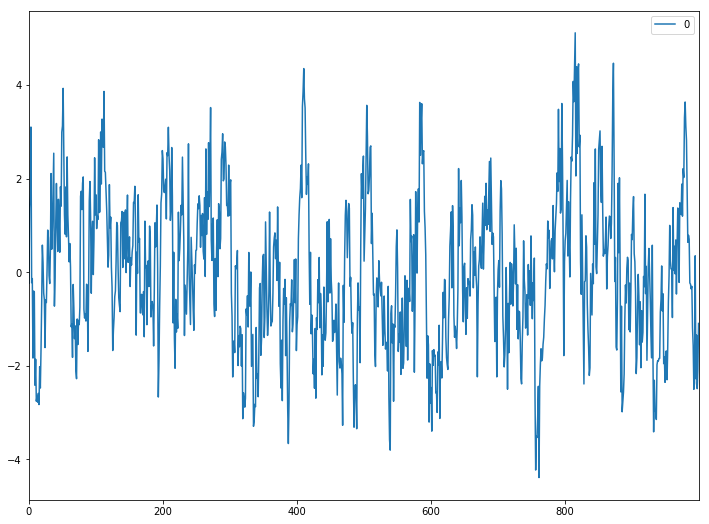

In [5]:
arp = generate_ar_p(1000, [0.6,0.2])
maq = generate_ma_q(1000, [0.6,0.3])
smaq = sample_maq()
pd.DataFrame(arp).plot(figsize=(12,9))
pd.DataFrame(maq).plot(figsize=(12,9))
pd.DataFrame(smaq).plot(figsize=(12,9))


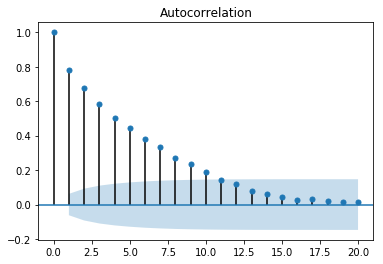

In [6]:
plot_acf(arp, lags=20)
plt.show()

In [7]:
plot_acf(maq, lags=20)
plt.show()

In [8]:
plot_acf(smaq, lags=20)
plt.show()

In [9]:
def test_ma_q(values, p=1,q=1):
    model = ARMA(endog=values, order = (p,q))
    #We cannot use ARMA(values ) because we need to check order for every q to test.
    mf = model.fit(ic='bic')
    print(mf.summary())
    print("k_ma = ", mf.k_ma)
    print("k_ar = ", mf.k_ar)
    print("coeff = ",mf.params)
    print("Conf Int \n",mf.conf_int())

In [10]:
test_ma_q(maq)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1462.394
Method:                       css-mle   S.D. of innovations              1.044
Date:                Fri, 17 May 2019   AIC                           2932.788
Time:                        10:26:47   BIC                           2952.419
Sample:                             0   HQIC                          2940.249
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1647      0.069      2.386      0.017       0.029       0.300
ar.L1.y        0.4670      0.045     10.345      0.000       0.379       0.556
ma.L1.y        0.1153      0.048      2.412      0.0

In [11]:
test_ma_q(maq, q=2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 2)   Log Likelihood               -1454.266
Method:                       css-mle   S.D. of innovations              1.036
Date:                Fri, 17 May 2019   AIC                           2918.533
Time:                        10:26:48   BIC                           2943.071
Sample:                             0   HQIC                          2927.859
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1642      0.063      2.627      0.009       0.042       0.287
ar.L1.y        0.0173      0.119      0.145      0.884      -0.216       0.251
ma.L1.y        0.5802      0.115      5.033      0.0

In [12]:
test_ma_q(smaq, q=1)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -131.653
Method:                       css-mle   S.D. of innovations              0.902
Date:                Fri, 17 May 2019   AIC                            271.306
Time:                        10:26:48   BIC                            281.727
Sample:                             0   HQIC                           275.524
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3139      0.176      1.779      0.078      -0.032       0.660
ar.L1.y        0.5906      0.160      3.689      0.000       0.277       0.904
ma.L1.y       -0.1897      0.192     -0.989      0.3

In [13]:
test_ma_q(arp, p=2,q=0)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1397.075
Method:                       css-mle   S.D. of innovations              0.978
Date:                Fri, 17 May 2019   AIC                           2802.150
Time:                        10:26:48   BIC                           2821.781
Sample:                             0   HQIC                          2809.611
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.170     -0.134      0.893      -0.356       0.310
ar.L1.y        0.6352      0.031     20.434      0.000       0.574       0.696
ar.L2.y        0.1837      0.031      5.902      0.0

/Users/sujogale/qstrader/qstraderp3/lib/python3.6/site-packages/scipy/signal/signaltools.py:961: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/sujogale/qstrader/qstraderp3/lib/python3.6/site-packages/scipy/signal/signaltools.py:964: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/sujogale/qstrader/qstraderp3/lib/python3.6/site-packages/scipy/signal/signaltools.py:970: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `

In [20]:
def test_ar_p(values):
    model = AR(values)
    mf = model.fit(ic='bic')
    print(mf.summary())
    print("k_ar = ", mf.k_ar)
    print("coeff = ",mf.params)
    print("normalized_cov_params\n", mf.normalized_cov_params)
    k = mf.k_ar
    coeff = mf.params[1:]
    covp = mf.normalized_cov_params
    variances = []
#     print(variances)
    for i in range(k):
        variances.append(covp[(i,i)])
    variances = np.array(variances).reshape(1,k)
#     print(coeff)
    confint = coeff + np.matmul(np.array([[-1.96],[1.96]]), variances)
    print("Confidence Intervals")
    confint = np.transpose(confint)
    print(confint)
    
    #Check if 0 is contained in confint.
    for i,row in enumerate(confint):
        if row[0] <= 0 <= row[1]:
            print("Zero is contained in confidence interval for parameter %d"%(i+1))

In [21]:
test_ar_p(arp)

None
k_ar =  2
coeff =  [-0.00553069  0.63635961  0.18358186]
normalized_cov_params
 [[ 1.00209692e-03  4.81702087e-06  1.52331732e-06]
 [ 4.81702087e-06  1.01078520e-03 -7.87932803e-04]
 [ 1.52331732e-06 -7.87932803e-04  1.01247068e-03]]
Confidence Intervals
[[0.6343955  0.63832372]
 [0.18160072 0.185563  ]]
